In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import sorting
import random
from sklearn.preprocessing import MinMaxScaler
import math
from collections import Counter,OrderedDict

In [2]:
# import ipywidgets as widgets
# !pip install ipywidgets

In [122]:
movie_data=pd.read_csv('movies.csv')
links=pd.read_csv('links.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

In [124]:
user_rating[1], pred_matrix

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 0.20301172, -0.08113113, -0.01858564, ..., -0.17161535,
        -0.10919687,  0.00021891]))

In [4]:
user_rating=np.zeros((len(np.unique(ratings['userId'])),len(np.unique(ratings['movieId']))))
train=np.zeros(user_rating.shape)
test=np.zeros(user_rating.shape)

In [5]:
for i in np.unique(ratings['userId']):
    k=ratings[ratings['userId']==i]
    for j in range(len(k)):
        if (k['movieId'].iloc[j]-1<=9742):
            user_rating[i-1,k['movieId'].iloc[j]-1]=k['rating'].iloc[j]

In [88]:
user_rating, user_rating.shape

(array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
        [3. , 0. , 0. , ..., 0. , 0. , 0. ],
        [5. , 0. , 0. , ..., 0. , 0. , 0. ]]), (610, 9724))

In [7]:
# user.shape

In [118]:
# gbest_users = []
# gbest_movies = []
from tqdm import tqdm as tqdm
gbest = None
# gbest_user = None
# gbest_movie = None
class Particle:
    
    def __init__(self, user_dims, movie_dims):
        
        self.error = float('inf')
        
        ####### USERS #######
#         self.curr_users = []
#         self.per_best_user = []
        self.curr_user = np.random.random(user_dims) #(610,k)
        self.per_best_user = self.curr_user
        self.velocity_user = np.random.random(user_dims)
        
        
#         self.curr_movies = []
#         self.velocity = []
#         self.per_best_movies = []

        ####### MOVIES #######
        self.curr_movie = np.random.random(movie_dims) #(9724,k)
        self.per_best_movie = self.curr_movie
        self.velocity_movie = np.random.random(movie_dims)
        
        
#         self.personal_best = np.dot(self.per_best_user, self.per_best_movie.T)
#         self.velocity = (np.random.random(dimens))
        
        
        
        
        
    def __str__(self):
        return "My error is {err}".format(err = self.error)
    
    
    def move(self):
        self.curr_user += self.velocity_user
        self.curr_movie += self.velocity_movie
        
        
def RMSE(prediction, target):
    return np.sqrt(np.mean((prediction-target)**2))


def PSO(iterations, population, c1, c2, result, latent_features):
    
    particles = []
    
    user_dims = (result.shape[0], latent_features)
    movie_dims = (result.shape[1], latent_features)
    print("userDims: ",user_dims)
    print("movie_dims: ",movie_dims)
#     pbar = tqdm(total=iterations)
    for i in range(population):
        particles.append(Particle(user_dims,movie_dims))
    
    error_min = 0.000001
    i = 0
    error = float("inf")
    gbest = Particle(user_dims,movie_dims)
#     gbest = particles[0]
    pred_matrix = None
    # number of epochs
    while i < iterations and gbest.error > error_min:
        
        for particle in tqdm(particles):
#             print(particle.curr_user)
            # result matrix that the particle produces
            particle_res = np.dot(particle.curr_user, particle.curr_movie.T)
#             print(particle_res.shape)
            
            # error
            particle_error = RMSE(particle_res, result)
#             print(particle_error)
            if particle_error < particle.error:
#                 particle.personal_best = particle_res
                particle.per_best_user = particle.curr_user
                particle.per_best_movie = particle.curr_movie
                particle.error = particle_error
                
            if particle_error < gbest.error:
                
                gbest = particle
#                 print("here")
#                 gbest.error = particle.error
#                 gbest.curr_user = particle.curr_user
#                 gbest.curr_movie = particle.curr_movie
#                 gbest.per_best_user = particle.per_best_user
#                 gbest.per_best_movie = particle.per_best_movie
                pred_matrix = particle_res
#                 print(gbest)
                
                
        for particle in particles:
            particle.velocity_user = 0.02*particle.velocity_user + c1*random.random()*(particle.per_best_user - particle.curr_user) + c2*random.random()*(gbest.per_best_user - particle.curr_user)
            particle.velocity_movie = 0.02*particle.velocity_movie + c1*random.random()*(particle.per_best_movie - particle.curr_movie) + c2*random.random()*(gbest.per_best_movie - particle.curr_movie)
            particle.move()
                
            
        print('epoch: {ep}, error {gbest}'.format(ep=i,gbest=gbest.error))
        i += 1
#         pbar.update(1)
            
#     pbar.close()
    return (gbest, pred_matrix)
    
    
# particle = Particle(2,2)
# print(particle.move)
# print(particle.curr_user)
# particle.move()
# print(particle.curr_user)

In [121]:
gbest, pred_matrix = PSO(10,500,2,5,user_rating,latent_features=3)
pred_matrix.shape


userDims:  (610, 3)
movie_dims:  (9724, 3)


  0%|▎                                                                                 | 2/500 [00:00<00:33, 15.08it/s]

epoch: 0, error 0.8758399956223206


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.79it/s]

epoch: 1, error 0.8682911551491631


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 2, error 0.8486500556332625


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 3, error 0.8438842817568206


  0%|▎                                                                                 | 2/500 [00:00<00:31, 16.05it/s]

epoch: 4, error 0.8357570993807742


  0%|▎                                                                                 | 2/500 [00:00<00:37, 13.11it/s]

epoch: 5, error 0.8302014483764294


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.84it/s]

epoch: 6, error 0.7972786988154666


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.22it/s]

epoch: 7, error 0.7941862301273164


  0%|▏                                                                                 | 1/500 [00:00<01:03,  7.83it/s]

epoch: 8, error 0.7853202550702199


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:02<00:00,  8.05it/s]


epoch: 9, error 0.7853202550702199


(610, 9724)

In [126]:
user_rating.shape

(610, 9724)

In [69]:
# !jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [139]:
# gbest_users = []
# gbest_movies = []
from tqdm import tqdm as tqdm
gbest = None
# gbest_user = None
# gbest_movie = None
class Particle:
    
    def __init__(self, user_dims, movie_dims):
        
        self.error = float('inf')
        
        ####### USERS #######
#         self.curr_users = []
#         self.per_best_user = []
        self.curr_user = np.random.random(user_dims) #(610,k)
        self.per_best_user = self.curr_user
        self.velocity_user = np.random.random(user_dims)
        
        
#         self.curr_movies = []
#         self.velocity = []
#         self.per_best_movies = []

        ####### MOVIES #######
        self.curr_movie = np.random.random(movie_dims) #(9724,k)
        self.per_best_movie = self.curr_movie
        self.velocity_movie = np.random.random(movie_dims)
        
        
#         self.personal_best = np.dot(self.per_best_user, self.per_best_movie.T)
#         self.velocity = (np.random.random(dimens))
        
        
        
        
        
    def __str__(self):
        return "My error is {err}".format(err = self.error)
    
    
    def move(self):
        self.curr_user += self.velocity_user
        self.curr_movie += self.velocity_movie
        
        
def RMSE(prediction, target):
    return np.sqrt(np.mean((prediction-target)**2))


def PSO(iterations, population, w, c1, c2, result, latent_features):
    
    particles = []
    errors = []
    user_dims = (result.shape[0], latent_features)
    movie_dims = (result.shape[1], latent_features)
    print("userDims: ",user_dims)
    print("movie_dims: ",movie_dims)
#     pbar = tqdm(total=iterations)
    for i in range(population):
        particles.append(Particle(user_dims,movie_dims))
    
    error_min = 0.000001
    i = 0
    error = float("inf")
    gbest = Particle(user_dims,movie_dims)
#     gbest = particles[0]
    pred_matrix = None
    # number of epochs
    while i < iterations and gbest.error > error_min:
        
        for particle in tqdm(particles):
#             print(particle.curr_user)
            # result matrix that the particle produces
            particle_res = np.dot(particle.curr_user, particle.curr_movie.T)
#             print(particle_res.shape)
            
            # error
            particle_error = RMSE(particle_res, result)
#             print(particle_error)
            if particle_error < particle.error:
#                 particle.personal_best = particle_res
                particle.per_best_user = particle.curr_user
                particle.per_best_movie = particle.curr_movie
                particle.error = particle_error
                
            if particle_error < gbest.error:
                
                gbest = particle
#                 print("here")
#                 gbest.error = particle.error
#                 gbest.curr_user = particle.curr_user
#                 gbest.curr_movie = particle.curr_movie
#                 gbest.per_best_user = particle.per_best_user
#                 gbest.per_best_movie = particle.per_best_movie
                pred_matrix = particle_res
#                 print(gbest)
                
                
        for particle in particles:
            particle.velocity_user = w*particle.velocity_user + c1*random.random()*(particle.per_best_user - particle.curr_user) + c2*random.random()*(gbest.per_best_user - particle.curr_user)
            particle.velocity_movie = w*particle.velocity_movie + c1*random.random()*(particle.per_best_movie - particle.curr_movie) + c2*random.random()*(gbest.per_best_movie - particle.curr_movie)
            particle.move()
                
        errors.append(gbest.error)
        print('epoch: {ep}, error {gbest}'.format(ep=i,gbest=gbest.error))
        i += 1
#         pbar.update(1)
            
#     pbar.close()
    return (gbest, pred_matrix, errors)
    
    
# particle = Particle(2,2)
# print(particle.move)
# print(particle.curr_user)
# particle.move()
# print(particle.curr_user)

In [140]:
(gbest, pred_matrix,errors) = PSO(30,500,0.02,2,5,user_rating,latent_features=3)
pred_matrix.shape


userDims:  (610, 3)
movie_dims:  (9724, 3)


  0%|▎                                                                                 | 2/500 [00:00<00:29, 16.71it/s]

epoch: 0, error 0.8757188885704215


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.92it/s]

epoch: 1, error 0.8752092752205722


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.79it/s]

epoch: 2, error 0.8668160726912457


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.97it/s]

epoch: 3, error 0.8613179175056179


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.43it/s]

epoch: 4, error 0.8613179175056179


  0%|▎                                                                                 | 2/500 [00:00<00:31, 16.04it/s]

epoch: 5, error 0.8602237454794178


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.97it/s]

epoch: 6, error 0.8580173278974282


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.30it/s]

epoch: 7, error 0.856669518183092


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.53it/s]

epoch: 8, error 0.856669518183092


  0%|▎                                                                                 | 2/500 [00:00<00:31, 16.04it/s]

epoch: 9, error 0.8566299248232491


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.02it/s]

epoch: 10, error 0.8566299248232491


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.43it/s]

epoch: 11, error 0.8553965588296483


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.57it/s]

epoch: 12, error 0.8553436596842414


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.67it/s]

epoch: 13, error 0.854126188535769


  0%|▎                                                                                 | 2/500 [00:00<00:41, 11.87it/s]

epoch: 14, error 0.854126188535769


  0%|▎                                                                                 | 2/500 [00:00<00:37, 13.11it/s]

epoch: 15, error 0.8521374784070821


  0%|▎                                                                                 | 2/500 [00:00<00:28, 17.59it/s]

epoch: 16, error 0.8520733316314981


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 17, error 0.8513348696995757


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 18, error 0.8492158050712005


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 19, error 0.8492158050712005


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.79it/s]

epoch: 20, error 0.8492158050712005


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.92it/s]

epoch: 21, error 0.8488232146828115


  0%|▏                                                                                 | 1/500 [00:00<01:08,  7.32it/s]

epoch: 22, error 0.8485181486532501


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 23, error 0.8480620516153596


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.85it/s]

epoch: 24, error 0.8480620516153596


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.19it/s]

epoch: 25, error 0.8480620516153596


  0%|▎                                                                                 | 2/500 [00:00<00:33, 15.08it/s]

epoch: 26, error 0.8480620516153596


  0%|▎                                                                                 | 2/500 [00:00<00:33, 15.08it/s]

epoch: 27, error 0.8480620516153596


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 28, error 0.8480620516153596


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:34<00:00, 14.62it/s]


epoch: 29, error 0.8480620516153596


(610, 9724)

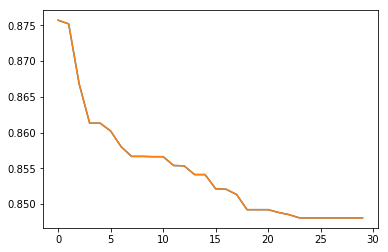

In [148]:
plt.plot(errors)
plt.show()

In [150]:
(gbest, pred_matrix,errors) = PSO(25,500,0.05,2,5,user_rating,latent_features=3)
pred_matrix.shape

userDims:  (610, 3)
movie_dims:  (9724, 3)


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.75it/s]

epoch: 0, error 0.8725596959655217


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.43it/s]

epoch: 1, error 0.8725596959655217


  0%|▎                                                                                 | 2/500 [00:00<00:37, 13.37it/s]

epoch: 2, error 0.8212538528269141


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.19it/s]

epoch: 3, error 0.7956222929119555


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.12it/s]

epoch: 4, error 0.7948748478735672


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.75it/s]

epoch: 5, error 0.7921963258304182


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 6, error 0.7876030116286529


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.17it/s]

epoch: 7, error 0.7874874374879208


  0%|▎                                                                                 | 2/500 [00:00<00:28, 17.29it/s]

epoch: 8, error 0.7784469764648736


  0%|▎                                                                                 | 2/500 [00:00<00:26, 18.57it/s]

epoch: 9, error 0.7170058252038026


  0%|▎                                                                                 | 2/500 [00:00<00:27, 17.90it/s]

epoch: 10, error 0.6987970621601216


  0%|▎                                                                                 | 2/500 [00:00<00:29, 16.85it/s]

epoch: 11, error 0.6949269377721872


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.53it/s]

epoch: 12, error 0.6873339925349456


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.79it/s]

epoch: 13, error 0.6822535367194565


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 14, error 0.6757490592478447


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.17it/s]

epoch: 15, error 0.6744024244441738


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.30it/s]

epoch: 16, error 0.674360612767305


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.43it/s]

epoch: 17, error 0.6743585861267584


  0%|▎                                                                                 | 2/500 [00:00<00:28, 17.59it/s]

epoch: 18, error 0.6743584849546062


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.97it/s]

epoch: 19, error 0.6743584798963983


  0%|▎                                                                                 | 2/500 [00:00<00:36, 13.64it/s]

epoch: 20, error 0.6743584796434889


  0%|▎                                                                                 | 2/500 [00:00<00:33, 15.08it/s]

epoch: 21, error 0.6740547951946265


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.92it/s]

epoch: 22, error 0.6729288631092757


  0%|▎                                                                                 | 2/500 [00:00<00:31, 16.04it/s]

epoch: 23, error 0.6727307884191603


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:34<00:00, 14.61it/s]


epoch: 24, error 0.6727307884191603


(610, 9724)

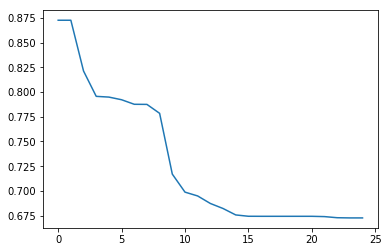

In [151]:
plt.plot(errors)
plt.show()

In [152]:
(gbest, pred_matrix,errors_) = PSO(25,500,0.02,2,7,user_rating,latent_features=3)
pred_matrix.shape

userDims:  (610, 3)
movie_dims:  (9724, 3)


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.17it/s]

epoch: 0, error 0.8755102233779393


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.53it/s]

epoch: 1, error 0.8678186930529238


  0%|▎                                                                                 | 2/500 [00:00<00:29, 16.99it/s]

epoch: 2, error 0.8678186930529238


  0%|▎                                                                                 | 2/500 [00:00<00:33, 15.08it/s]

epoch: 3, error 0.8661578341242397


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 4, error 0.855817957337972


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.85it/s]

epoch: 5, error 0.8543685195418742


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.12it/s]

epoch: 6, error 0.8535505054161476


  0%|▎                                                                                 | 2/500 [00:00<00:37, 13.37it/s]

epoch: 7, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.02it/s]

epoch: 8, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.22it/s]

epoch: 9, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.43it/s]

epoch: 10, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.12it/s]

epoch: 11, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 12, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 13, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.79it/s]

epoch: 14, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 15, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.79it/s]

epoch: 16, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 17, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.67it/s]

epoch: 18, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.67it/s]

epoch: 19, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 20, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.17it/s]

epoch: 21, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.43it/s]

epoch: 22, error 0.8524355797285589


  0%|▎                                                                                 | 2/500 [00:00<00:29, 16.99it/s]

epoch: 23, error 0.8524355797285589


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:33<00:00, 14.86it/s]


epoch: 24, error 0.8524355797285589


(610, 9724)

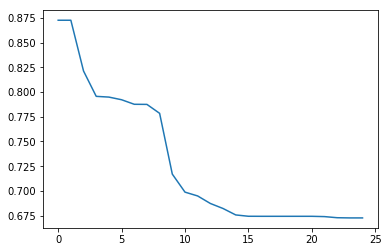

In [153]:
plt.plot(errors)
plt.show()

In [154]:
(gbest, pred_matrix,errors) = PSO(25,500,0.05,2,2,user_rating,latent_features=3)
pred_matrix.shape

userDims:  (610, 3)
movie_dims:  (9724, 3)


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.67it/s]

epoch: 0, error 0.8758566569984028


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.43it/s]

epoch: 1, error 0.8758566569984028


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 2, error 0.8346776990788598


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 3, error 0.8043148688925088


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.55it/s]

epoch: 4, error 0.7758298769318597


  0%|▎                                                                                 | 2/500 [00:00<00:29, 16.85it/s]

epoch: 5, error 0.7617649799640289


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.92it/s]

epoch: 6, error 0.7423233176886045


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.75it/s]

epoch: 7, error 0.720713225223217


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.43it/s]

epoch: 8, error 0.6867354492616404


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 9, error 0.6633321120566094


  0%|▎                                                                                 | 2/500 [00:00<00:29, 16.85it/s]

epoch: 10, error 0.662245427752894


  0%|▎                                                                                 | 2/500 [00:00<00:30, 16.30it/s]

epoch: 11, error 0.6606771791019919


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.67it/s]

epoch: 12, error 0.6601223111386916


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.85it/s]

epoch: 13, error 0.6597299246629813


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.31it/s]

epoch: 14, error 0.6593099164613044


  0%|▎                                                                                 | 2/500 [00:00<00:32, 15.19it/s]

epoch: 15, error 0.6587060122555652


  0%|▎                                                                                 | 2/500 [00:00<00:40, 12.30it/s]

epoch: 16, error 0.6576754368328738


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.12it/s]

epoch: 17, error 0.6566273943750397


  0%|▎                                                                                 | 2/500 [00:00<00:33, 15.08it/s]

epoch: 18, error 0.6558692233398798


  0%|▎                                                                                 | 2/500 [00:00<00:34, 14.64it/s]

epoch: 19, error 0.6548127060749587


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.85it/s]

epoch: 20, error 0.6540988237355463


  0%|▎                                                                                 | 2/500 [00:00<00:31, 15.67it/s]

epoch: 21, error 0.65365810913361


  0%|▎                                                                                 | 2/500 [00:00<00:35, 14.02it/s]

epoch: 22, error 0.653576268677987


  0%|▎                                                                                 | 2/500 [00:00<00:33, 14.75it/s]

epoch: 23, error 0.6535319876938727


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:36<00:00, 13.79it/s]


epoch: 24, error 0.653520595604674


(610, 9724)

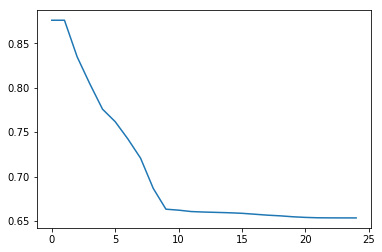

In [155]:
plt.plot(errors)
plt.show()

In [157]:
pred_matrix

(610, 9724)